## Working with GDP data

### Introduction
This notebook aims to analyze the velocity data from drifters within the tropical Atlantic Ocean. 
The current variables are represented here by $ve$, $vn$.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 967
  - link : https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period :  01-01-2019 to 31-12-2023

## Import library

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config

## Read Drifter Data

In [2]:
fn='./drifter_6hour_qc_82c1_ec1c_ea57_U1721837077629.nc';
ds=xr.open_dataset(fn);

## Extract coordinates and variables

In [3]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values 

## Determining Minimum and Maximum Latitude, Longitude, Time, ve, vn, and sst 
# for Mapping

In [4]:
print("min_lat = ", min(ds.latitude.values))
print("max_lat = ", max(ds.latitude.values))
print("min_lon = ", min(ds.longitude.values))
print("max_lon = ", max(ds.longitude.values))
print("min_time = ", min(ds.time.values))
print("max_time = ", max(ds.time.values))
print("min_ve = ", min(ds.ve.values))
print("max_ve = ", max(ds.ve.values))
print("min_vn = ", min(ds.vn.values))
print("max_vn = ", max(ds.vn.values))

min_lat =  -20.0
max_lat =  20.0
min_lon =  -70.0
max_lon =  11.195
min_time =  2019-01-01T00:00:00.000000000
max_time =  2023-12-31T18:00:00.000000000
min_ve =  -999999.0
max_ve =  2.42826
min_vn =  -999999.0
max_vn =  2.72021


## let's plot the ve and vn

## At the stat of their deploymennt : note that we have approximatively 967 Drifters in our study zone

## Drifters trajectories On all the period

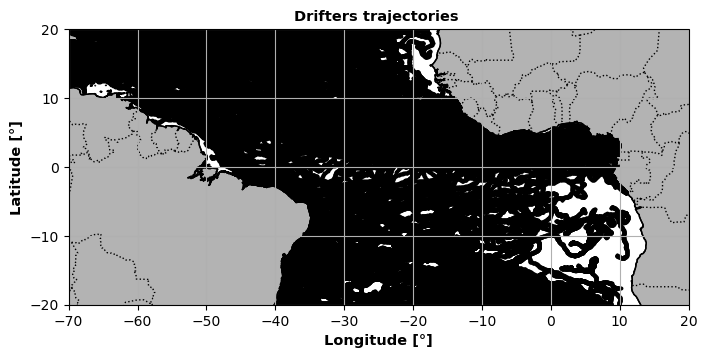

In [5]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    color='k',
    s=3,
    transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Title and axes labels
ax.set_title('Drifters trajectories ', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig1 mode.png")
plt.show()

## case of ve

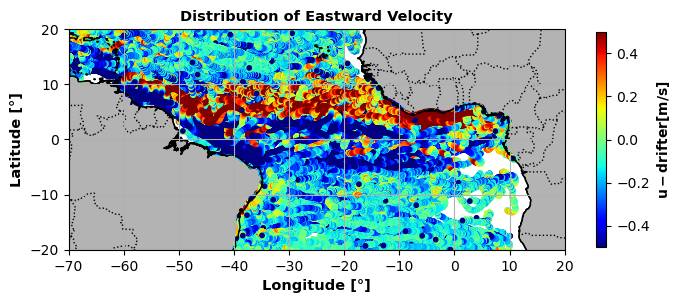

In [6]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.ve.values,
    vmin=-0.5,
    vmax= 0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Specify colorbar limits based on actual Eastward velocity values
plt.colorbar(sc, orientation='vertical', shrink=0.7,label=r'$\mathbf{u-drifter [m/s]}$')

# Title and axes labels
ax.set_title('Distribution of Eastward Velocity', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig2 mode.png")
plt.show()

## case of vn

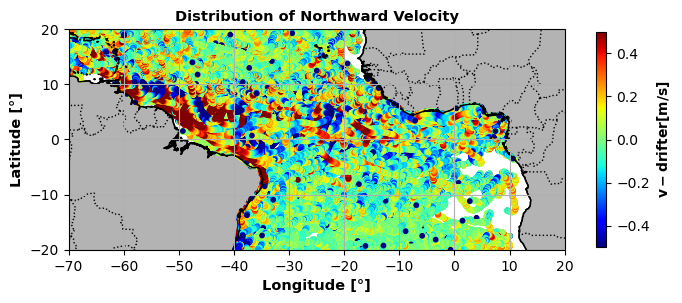

In [7]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.vn.values,
    vmin=-0.5,
    vmax=0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Specify colorbar limits based on actual Northward velocity values
plt.colorbar(sc, orientation='vertical', shrink=0.7,label=r'$\mathbf{v-drifter [m/s]}$'  )

# Title and axes labels
ax.set_title('Distribution of Northward Velocity', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig3 mode.png")
plt.show()